In [7]:
import pandas as pd
import seaborn as sns; sns.set(font_scale=1.2)
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from matplotlib.colors import Normalize
from sklearn import svm
import matplotlib.pyplot as plt

In [8]:
headers = []
for i in range(1, 35):
    headers.append("col_" + str(i))
headers.append("result")
print(headers)

['col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7', 'col_8', 'col_9', 'col_10', 'col_11', 'col_12', 'col_13', 'col_14', 'col_15', 'col_16', 'col_17', 'col_18', 'col_19', 'col_20', 'col_21', 'col_22', 'col_23', 'col_24', 'col_25', 'col_26', 'col_27', 'col_28', 'col_29', 'col_30', 'col_31', 'col_32', 'col_33', 'col_34', 'result']


In [9]:
data = pd.read_csv("ionosphere.data", delimiter=',', names = headers)
data.head()


,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,...,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,result
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


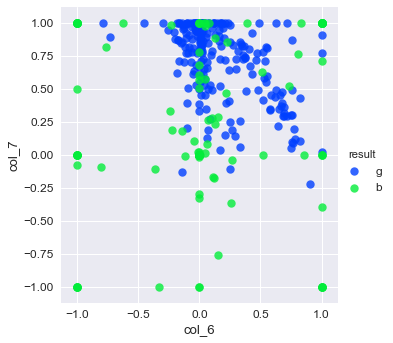

In [10]:
#see the relationship among the data columns
sns.lmplot('col_6', 'col_7', data=data, hue='result', palette='bright', fit_reg=False, scatter_kws={"s": 70});

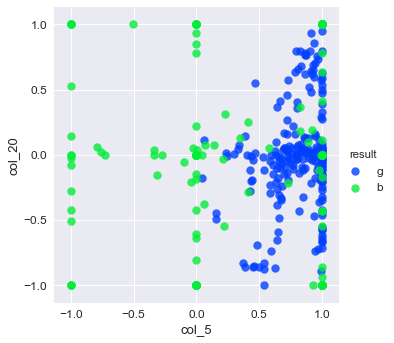

In [11]:
#see the relationship among the data columns
sns.lmplot('col_5', 'col_20', data=data, hue='result', palette='bright', fit_reg=False, scatter_kws={"s": 70});

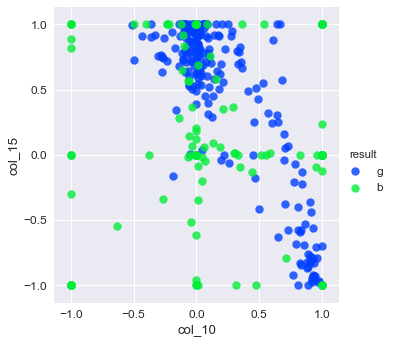

In [12]:
#see the relationship among the data columns
sns.lmplot('col_10', 'col_15', data=data, hue='result', palette='bright', fit_reg=False, scatter_kws={"s": 70});

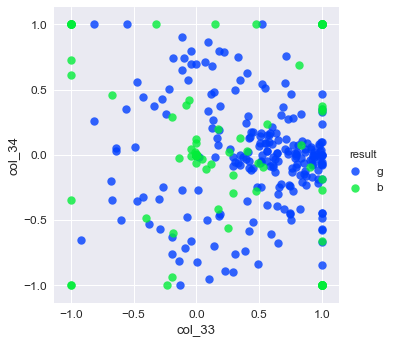

In [13]:
#see the relationship among the data columns
sns.lmplot('col_33', 'col_34', data=data, hue='result', palette='bright', fit_reg=False, scatter_kws={"s": 70});

In [14]:
f = data.drop(['col_1', 'col_2','result'], axis=1)
f.head()

,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,...,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34
0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,...,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,...,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,...,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697


In [15]:
# Specify inputs for the model


selected_features = data[['col_5','col_20']].as_matrix()
#selected_features = f.as_matrix()
type_label = np.where(data['result']=='b', 0, 1)

# Feature names
data_features = data.columns.values[0:34].tolist()
data_features

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


['col_1',
 'col_2',
 'col_3',
 'col_4',
 'col_5',
 'col_6',
 'col_7',
 'col_8',
 'col_9',
 'col_10',
 'col_11',
 'col_12',
 'col_13',
 'col_14',
 'col_15',
 'col_16',
 'col_17',
 'col_18',
 'col_19',
 'col_20',
 'col_21',
 'col_22',
 'col_23',
 'col_24',
 'col_25',
 'col_26',
 'col_27',
 'col_28',
 'col_29',
 'col_30',
 'col_31',
 'col_32',
 'col_33',
 'col_34']

<h1>Fit the SVM for two data columns withoiut data standardization</h1>

In [16]:
# Fit the SVM model
model = svm.SVC(kernel='linear')
model.fit(selected_features, type_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [17]:
# Get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30, 60)
yy = a * xx - (model.intercept_[0]) / w[1]

# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

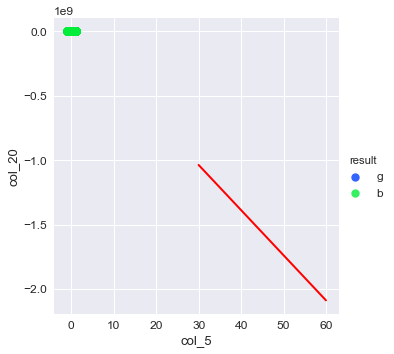

In [18]:
# Plot the hyperplane
sns.lmplot('col_5', 'col_20', data=data, hue='result', palette='bright', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='red');

<h1> Apply SVC for all data columns</h1>

In [19]:
data.head()

,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,...,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,result
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [23]:
data = np.genfromtxt("ionosphere_2.data", delimiter=',')
print(data)
features = data[:, :-1]
labels = data[:, [-1]]

print(features)
#print(labels)

[[ 1.       0.       0.99539 ...  0.18641 -0.453    1.     ]
 [ 1.       0.       1.      ... -0.13738 -0.02447  0.     ]
 [ 1.       0.       1.      ...  0.56045 -0.38238  1.     ]
 ...
 [ 1.       0.       0.94701 ...  0.92697 -0.00577  1.     ]
 [ 1.       0.       0.90608 ...  0.87403 -0.16243  1.     ]
 [ 1.       0.       0.8471  ...  0.85764 -0.06151  1.     ]]
[[ 1.       0.       0.99539 ... -0.54487  0.18641 -0.453  ]
 [ 1.       0.       1.      ... -0.06288 -0.13738 -0.02447]
 [ 1.       0.       1.      ... -0.2418   0.56045 -0.38238]
 ...
 [ 1.       0.       0.94701 ...  0.00442  0.92697 -0.00577]
 [ 1.       0.       0.90608 ... -0.03757  0.87403 -0.16243]
 [ 1.       0.       0.8471  ... -0.06678  0.85764 -0.06151]]


In [25]:
features = StandardScaler().fit_transform(features)
trainFeatures, validFeatures, trainLabels, validLabels = train_test_split(features, labels, test_size=0.25, random_state=26)
trainLabels = trainLabels.ravel()
validLabels = validLabels.ravel()

<h1>Problem-1: Coarse Grid </h1>

In [26]:
parameters = {'kernel': ['rbf'],
              'C': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
              'gamma': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}

model = svm.SVC()
clf = GridSearchCV(model, parameters)
clf.fit(trainFeatures, trainLabels)

print(clf.best_params_)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [27]:
y_actual, y_prediction = validLabels, clf.predict(validFeatures)
print(classification_report(y_actual, y_prediction))

scores = clf.cv_results_['mean_test_score'].reshape(len(parameters['C']),len(parameters['gamma']))

             precision    recall  f1-score   support

        0.0       0.91      0.97      0.94        31
        1.0       0.98      0.95      0.96        57

avg / total       0.96      0.95      0.95        88



In [31]:
class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

In [39]:
def plot(scores, parameters):
    plt.figure(figsize=(8, 6))
    plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
    plt.imshow(scores, interpolation='nearest', cmap=plt.cm.viridis, norm=MidpointNormalize(vmin=0.2, midpoint=0.82, vmax=1.0))
    plt.xlabel('gamma')
    plt.ylabel('C')
    plt.colorbar()
    plt.xticks(np.arange(len(parameters['gamma'])), parameters['gamma'], rotation=45)
    plt.yticks(np.arange(len(parameters['C'])), parameters['C'])
    plt.show()


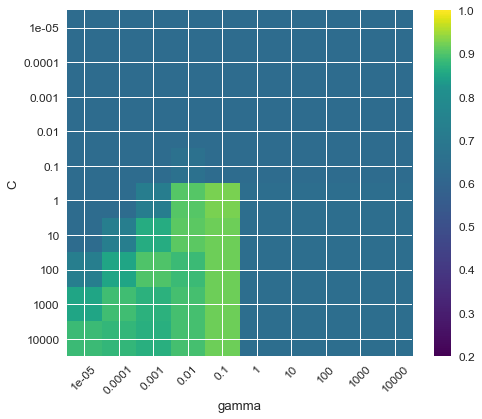

In [37]:
plot(scores, parameters)

<h1>Problem-1: Fine Grid </h1>

In [47]:
parameters_fine_grain = {'kernel': ['rbf'],
              'C': [0.1, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8],
              'gamma': [0.05, 0.07, 0.08, 0.09, 0.1, .12, .14, .16, .18, .20]}

{'C': 0.4, 'gamma': 0.08, 'kernel': 'rbf'}
             precision    recall  f1-score   support

        0.0       0.91      0.94      0.92        31
        1.0       0.96      0.95      0.96        57

avg / total       0.94      0.94      0.94        88



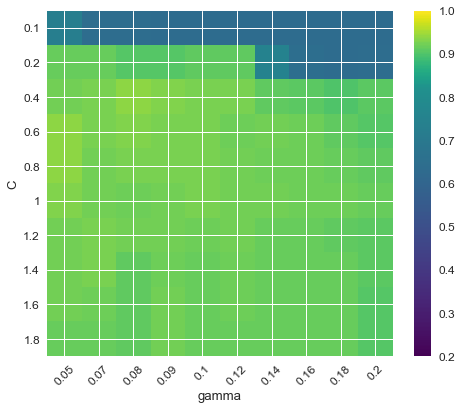

In [48]:
clf = GridSearchCV(model, parameters_fine_grain)
clf.fit(trainFeatures, trainLabels)

print(clf.best_params_)

y_actual, y_prediction = validLabels, clf.predict(validFeatures)
print(classification_report(y_actual, y_prediction))

scores = clf.cv_results_['mean_test_score'].reshape(len(parameters_fine_grain['C']),
                                                     len(parameters_fine_grain['gamma']))
plot(scores, parameters_fine_grain)

<h1>Problem-2: Coarse Grid </h1>

[[ 0.     0.     0.    ... -0.874 -0.814  0.   ]
 [ 0.     0.     0.    ... -0.621 -0.488  1.   ]
 [ 0.     0.     0.    ... -0.809 -0.049  2.   ]
 ...
 [ 1.    14.     1.    ... -0.773 -0.5    8.   ]
 [ 1.    14.     1.    ... -0.863 -0.39   9.   ]
 [ 1.    14.     1.    ... -1.046  0.697 10.   ]]
{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00        25
        1.0       0.90      1.00      0.95        18
        2.0       1.00      1.00      1.00        29
        3.0       0.96      1.00      0.98        25
        4.0       1.00      0.96      0.98        26
        5.0       0.95      0.91      0.93        22
        6.0       1.00      1.00      1.00        21
        7.0       1.00      1.00      1.00        18
        8.0       1.00      1.00      1.00        21
        9.0       1.00      0.88      0.94        26
       10.0       0.89      1.00      0.94        17

avg / total       0.9

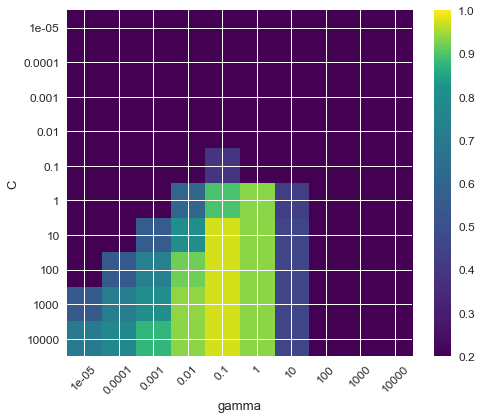

In [49]:
data = np.genfromtxt("vowel-context_2.data", delimiter=' ')
print(data)
data = np.delete(data, [0, 1, 2] , axis=1)
features = data[:, :-1]
labels = data[:, [-1]]

features = StandardScaler().fit_transform(features)
trainFeatures, validFeatures, trainLabels, validLabels = train_test_split(features, labels, test_size=0.25, random_state=26)
trainLabels = trainLabels.ravel()
validLabels = validLabels.ravel()

model = svm.SVC()
clf = GridSearchCV(model, parameters)
clf.fit(trainFeatures, trainLabels)

print(clf.best_params_)

y_true, y_pred = validLabels, clf.predict(validFeatures)
print(classification_report(y_true, y_pred))

scores = clf.cv_results_['mean_test_score'].reshape(len(parameters['C']),
                                                     len(parameters['gamma']))

plot(scores, parameters)

<h1>Problem-2: Fine Grid </h1>

In [50]:
parameters_fine_grain = {'kernel': ['rbf'],
              'C': [0.1, 0.5, 1, 2.5, 5, 10, 20, 30, 40, 50],
              'gamma': [0.05, 0.07, 0.08, 0.09, 0.1, .12, .14, .16, .18, .20]}

{'C': 40, 'gamma': 0.08, 'kernel': 'rbf'}
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00        25
        1.0       0.90      1.00      0.95        18
        2.0       1.00      1.00      1.00        29
        3.0       0.96      1.00      0.98        25
        4.0       1.00      0.96      0.98        26
        5.0       0.95      0.91      0.93        22
        6.0       1.00      1.00      1.00        21
        7.0       1.00      1.00      1.00        18
        8.0       0.91      1.00      0.95        21
        9.0       1.00      0.85      0.92        26
       10.0       0.94      1.00      0.97        17

avg / total       0.97      0.97      0.97       248



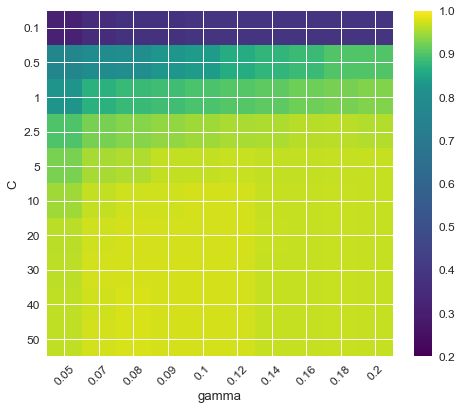

In [52]:
clf = GridSearchCV(model, parameters_fine_grain)
clf.fit(trainFeatures, trainLabels)

print(clf.best_params_)

y_actual, y_prediction = validLabels, clf.predict(validFeatures)
print(classification_report(y_actual, y_prediction))

scores = clf.cv_results_['mean_test_score'].reshape(len(parameters_fine_grain['C']), len(parameters_fine_grain['gamma']))
plot(scores, parameters_fine_grain)

<h1>Problem-3: Coarse Grid </h1>

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
             precision    recall  f1-score   support

        1.0       0.98      1.00      0.99       461
        2.0       0.97      0.98      0.97       224
        3.0       0.87      0.97      0.92       397
        4.0       0.77      0.63      0.69       211
        5.0       0.94      0.90      0.92       237
        7.0       0.89      0.87      0.88       470

avg / total       0.91      0.91      0.91      2000



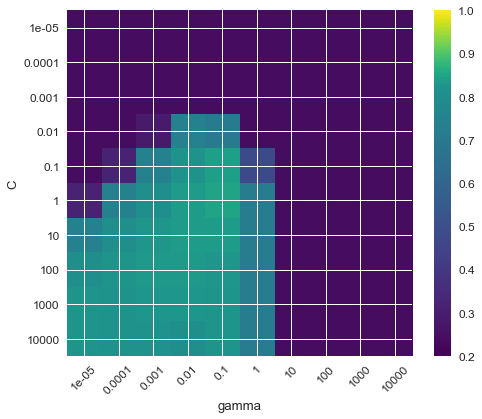

In [54]:
trainFeatures = np.genfromtxt("sat.trn", delimiter=' ')
trainLabels = trainFeatures[:, [-1]]

trainFeatures = np.delete(trainFeatures, -1, axis=1)
trainFeatures = StandardScaler().fit_transform(trainFeatures)
trainLabels = trainLabels.ravel()

validFeatures = np.genfromtxt("sat.tst", delimiter=' ')
validLabels = validFeatures[:, [-1]]

validFeatures = np.delete(validFeatures, -1, axis=1)
validFeatures = StandardScaler().fit_transform(validFeatures)
validLabels = validLabels.ravel()

model = svm.SVC()
clf = GridSearchCV(model, parameters)
clf.fit(trainFeatures, trainLabels)

print(clf.best_params_)

y_actual, y_prediction = validLabels, clf.predict(validFeatures)
print(classification_report(y_actual, y_prediction))

scores = clf.cv_results_['mean_test_score'].reshape(len(parameters['C']),
                                                     len(parameters['gamma']))
plot(scores, parameters)

<h1>Problem-3: Fine Grid </h1>

In [55]:
parameters_fine_grain = {'kernel': ['rbf'],
              'C': [0.1, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8],
              'gamma': [0.05, 0.07, 0.08, 0.09, 0.1, .12, .14, .16, .18, .20]}

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
             precision    recall  f1-score   support

        1.0       0.98      1.00      0.99       461
        2.0       0.97      0.98      0.97       224
        3.0       0.87      0.97      0.92       397
        4.0       0.77      0.63      0.69       211
        5.0       0.94      0.90      0.92       237
        7.0       0.89      0.87      0.88       470

avg / total       0.91      0.91      0.91      2000



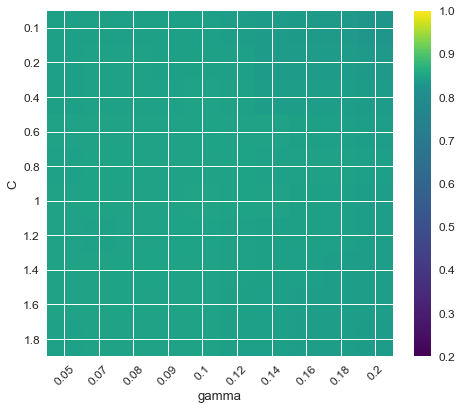

In [56]:
clf = GridSearchCV(model, parameters_fine_grain)
clf.fit(trainFeatures, trainLabels)

print(clf.best_params_)

y_actual, y_prediction = validLabels, clf.predict(validFeatures)
print(classification_report(y_actual, y_prediction))

scores = clf.cv_results_['mean_test_score'].reshape(len(parameters_fine_grain['C']),
                                                     len(parameters_fine_grain['gamma']))
plot(scores, parameters_fine_grain)